## Observations and Insights

* The boxplots I created below show that the Ceftamin drug regimen has the least variability among its final tumor volume data (tumor volume measured on day 45 of the study). However, Capomulin and Ramicane have the lowest final tumor volumes (which is the outcome desired, indicating that tumor has become smaller as a result of the drug treatment) but greater variability. Capomulin and Ramicane had the highest numbers of data points compared to the other drug regimens, which could contribute to the greater variability among their data.
* The linear regression model for Mouse Weight vs. Average Tumor Volume for Capomulin Regimen shows a strong positive linear relationship, with a correlation coefficient of 0.84. Tumor volume increases as mouse weight increases for the mice in this treatment regimen.
* My calculations for IQR and the boxplots I created show no outliers for any of the 4 drug regimens Capomulin, Ramicane, Infubinol, and Ceftamin. This indicates that the data is reliable and all data points can be considered in the data analysis with no reasons to possibly exclude any.

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM (standard error of the mean) 
# of the tumor volume for each regimen

# Set Drug Regimen as index and show Tumor Vol
tumor_vol = data_complete.set_index(["Drug Regimen"])["Tumor Volume (mm3)"]
tumor_vol

Drug Regimen
Ramicane    45.000000
Ramicane    38.825898
Ramicane    35.014271
Ramicane    34.223992
Ramicane    32.997729
              ...    
Naftisol    63.145652
Naftisol    65.841013
Naftisol    69.176246
Naftisol    70.314904
Naftisol    73.867845
Name: Tumor Volume (mm3), Length: 1893, dtype: float64

In [3]:
# Group by Drug Regimen and show summary statistics
tumor_vol_grouped = tumor_vol.groupby("Drug Regimen")
tumor_vol_grouped.describe()

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,161.0,52.322552,6.507770,45.000000,47.081086,50.854632,56.184664,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


In [4]:
# Retrieve mean column from previous cell
tumor_vol_mean = tumor_vol_grouped.describe()["mean"]
tumor_vol_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: mean, dtype: float64

In [5]:
# Calculate median 
tumor_vol_median = tumor_vol_grouped.median()
tumor_vol_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [6]:
# Calculate variance
tumor_vol_var = tumor_vol_grouped.var()
tumor_vol_var

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [7]:
# Retrieve standard deviation column from tumor_vol_grouped.describe
tumor_vol_std = tumor_vol_grouped.describe()["std"]
tumor_vol_std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.507770
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: std, dtype: float64

In [8]:
# Calculate SEM
tumor_vol_sem = tumor_vol_grouped.sem()
tumor_vol_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [9]:
# Create dataframe for above summary statistics
tumor_vol_stats = pd.DataFrame({"Tumor Volume Mean": tumor_vol_mean, 
                                "Tumor Volume Median": tumor_vol_median,
                                "Tumor Volume Variance": tumor_vol_var,
                                "Tumor Volume Standard Deviation": tumor_vol_std,
                                "Tumor Volume SEM": tumor_vol_sem,
                               })

tumor_vol_stats

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [10]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# Filter the DataFrame down only to the column to chart and find counts per drug regimen
drug_regimen = data_complete["Drug Regimen"].value_counts()
drug_regimen.head()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Name: Drug Regimen, dtype: int64

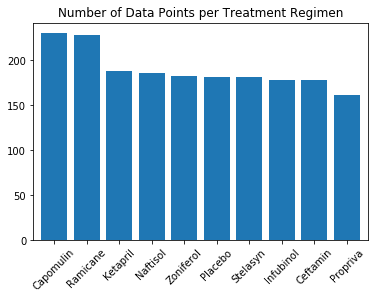

<Figure size 432x288 with 0 Axes>

In [11]:
# Use DataFrame.plot() in order to create a bar chart of the data
drug_regimen.plot(kind="bar", rot=45, width=.8)

# Set a title for the chart
plt.title("Number of Data Points per Treatment Regimen")

# Display chart
plt.show()
plt.tight_layout()

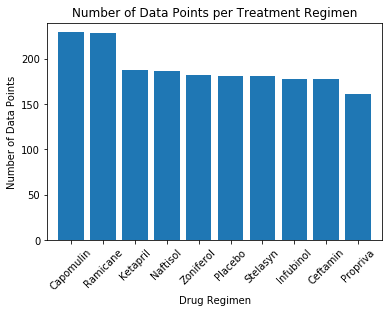

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# Use drug_regimen from above as data points
x_axis = np.arange(len(drug_regimen))

# Drug regimen names will be tick names
tick_locations = [] 
for x in x_axis:
    tick_locations.append(x)

# Set title and x and y labels
plt.title("Number of Data Points per Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

# Set x and y limits
plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(drug_regimen) + 10)

# Generate bar plot and load ticks
plt.bar(x_axis, drug_regimen)
plt.xticks(tick_locations, drug_regimen.index, rotation=45)

# Display chart
plt.show()
plt.tight_layout()

## Pie plots

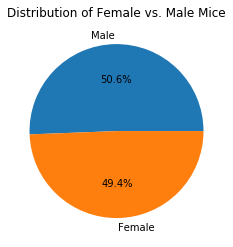

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Filter the DataFrame down only to those columns to chart
gender = data_complete["Sex"].value_counts()

# Generate pie plot and set title and labels and display chart
gender_pie= gender.plot(kind="pie", autopct="%1.1f%%", title=("Distribution of Female vs. Male Mice"))
gender_pie.set_ylabel('')
plt.show()
plt.tight_layout()

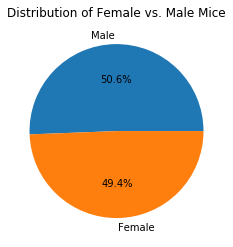

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Tell matplotlib to create a pie chart based upon the above data, set title, and display chart
plt.pie(gender, labels=gender.index, autopct="%1.1f%%")
plt.title('Distribution of Female vs. Male Mice')
plt.show()

## Quartiles, outliers and boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.

# Retrieve data for each mouse for highest timepoint
final_tumor_vol = data_complete.loc[data_complete["Timepoint"] == data_complete["Timepoint"].max(), :]

# Set index to Mouse ID
tumor_vol_index = final_tumor_vol.set_index('Mouse ID')

# Select only the 4 drug regimens
tumor_vol_regimens = tumor_vol_index[(tumor_vol_index['Drug Regimen'] == 'Capomulin') |
                                     (tumor_vol_index['Drug Regimen'] == 'Ramicane') |
                                     (tumor_vol_index['Drug Regimen'] == 'Infubinol') |
                                     (tumor_vol_index['Drug Regimen'] == 'Ceftamin')
                                    ]

# Display data showing Drug Regimen and final tumor vol for each mouse in those regimen groups
final_tumor_vol_regimens = tumor_vol_regimens[['Drug Regimen', 'Tumor Volume (mm3)']]
final_tumor_vol_regimens

,Drug Regimen,Tumor Volume (mm3)
Mouse ID,,
k403,Ramicane,22.050126
s185,Capomulin,23.343598
x401,Capomulin,28.484033
m601,Capomulin,28.430964
g791,Ramicane,29.128472
...,...,...
x822,Ceftamin,61.386660
y163,Infubinol,67.685569
y769,Ceftamin,68.594745


In [16]:
# Find final tumor volume for each mouse in each drug regimen
final_tumor_vol_cap = final_tumor_vol.loc[final_tumor_vol["Drug Regimen"] == "Capomulin", :]
final_tumor_vol_ram = final_tumor_vol.loc[final_tumor_vol["Drug Regimen"] == "Ramicane", :]
final_tumor_vol_inf = final_tumor_vol.loc[final_tumor_vol["Drug Regimen"] == "Infubinol", :]
final_tumor_vol_cef = final_tumor_vol.loc[final_tumor_vol["Drug Regimen"] == "Ceftamin", :]
#final_tumor_vol_cap

In [17]:
# Capomulin - Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = final_tumor_vol_cap['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin is: {lowerq}")
print(f"The upper quartile of Capomulin is: {upperq}")
print(f"The interquartile range of Capomulin is: {iqr}")
print(f"The the median of Capomulin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 37.31184577 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [18]:
# Ramicane - Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = final_tumor_vol_ram['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane is: {lowerq}")
print(f"The upper quartile of Ramicane is: {upperq}")
print(f"The interquartile range of Ramicane is: {iqr}")
print(f"The the median of Ramicane is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane is: 30.981175224999998
The upper quartile of Ramicane is: 38.508305307499995
The interquartile range of Ramicane is: 7.527130082499998
The the median of Ramicane is: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


In [19]:
# Infubinol - Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = final_tumor_vol_inf['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol is: {lowerq}")
print(f"The upper quartile of Infubinol is: {upperq}")
print(f"The interquartile range of Infubinol is: {iqr}")
print(f"The the median of Infubinol is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol is: 62.75445141
The upper quartile of Infubinol is: 67.68556862
The interquartile range of Infubinol is: 4.9311172099999965
The the median of Infubinol is: 66.08306589 
Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999 could be outliers.


In [20]:
# Ceftamin - Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = final_tumor_vol_cef['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin is: {lowerq}")
print(f"The upper quartile of Ceftamin is: {upperq}")
print(f"The interquartile range of Ceftamin is: {iqr}")
print(f"The the median of Ceftamin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin is: 61.43389223
The upper quartile of Ceftamin is: 67.52748237
The interquartile range of Ceftamin is: 6.093590140000003
The the median of Ceftamin is: 64.29983003 
Values below 52.29350701999999 could be outliers.
Values above 76.66786758 could be outliers.


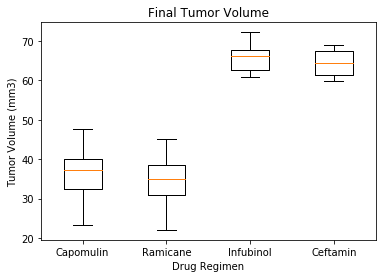

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

data = [final_tumor_vol_cap['Tumor Volume (mm3)'],
        final_tumor_vol_ram['Tumor Volume (mm3)'],
        final_tumor_vol_inf['Tumor Volume (mm3)'],
        final_tumor_vol_cef['Tumor Volume (mm3)']]
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(data)
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and scatter plots

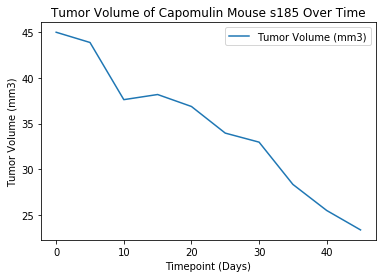

<Figure size 432x288 with 0 Axes>

In [22]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_id = "s185"
one_cap_df = data_complete.loc[data_complete['Mouse ID'] == mouse_id, ['Timepoint', 'Tumor Volume (mm3)']]
#one_cap_df   
one_cap_line = one_cap_df.plot.line(x = 'Timepoint', y = 'Tumor Volume (mm3)',
                                    title=("Tumor Volume of Capomulin Mouse " + mouse_id + " Over Time"))
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()
plt.tight_layout()

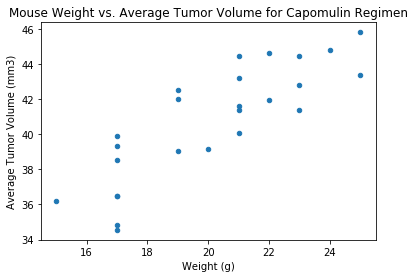

<Figure size 432x288 with 0 Axes>

In [23]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap = data_complete.loc[data_complete["Drug Regimen"] == "Capomulin", :]
cap_grouped = cap.groupby('Mouse ID')
cap_grouped_mean = cap_grouped.mean()
#cap_grouped_mean.head()
cap_scatter = cap_grouped_mean.plot(kind='scatter', x = 'Weight (g)', y = 'Tumor Volume (mm3)',
                                    title=("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen"))
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
plt.tight_layout()

In [24]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
weight = cap_grouped_mean.iloc[:,1]
avg_tumor_vol = cap_grouped_mean.iloc[:,3]
correlation = st.pearsonr(weight,avg_tumor_vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


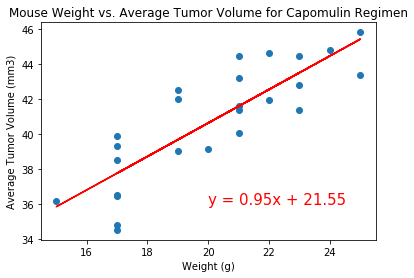

In [25]:
# Calculate linear regression model for mouse weight and average tumor volume for the Capomulin regimen
# Plot the linear regression model on top of the previous scatter plot
x_values = cap_grouped_mean.iloc[:,1]
y_values = cap_grouped_mean.iloc[:,3]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.show()